# Non-Text Data Exploration

In [2]:
#!pip install pandas-profiling[notebook]
!pip install nltk
!pip install textblob
!pip install langdetect
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from pandas_profiling import ProfileReport

In [4]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv').drop('index',axis=1)
products.head()

product        user_id    age          date  \
0  Blush - Orgasm          kyl77  36-43   21 days ago   
1  Blush - Orgasm    ladyinred29  44-55   25 days ago   
2  Blush - Orgasm    BougieAngel  30-35   a month ago   
3  Blush - Orgasm    Leahmoriah4  44-55  2 months ago   
4  Blush - Orgasm  Avalonian1172  30-35  3 months ago   

                                              review  ratings repurchase  \
0  This blush is suppose to be a universally flat...      5.0        65%   
1  This blush is a beautiful color.  It isn't ter...      3.0        65%   
2  After purchasing this I didn't want to touch i...      4.0        65%   
3  I'm 48, Caucasian with olive undertones so tru...      5.0        65%   
4  I have to mention that the case is fabulous. A...      4.0        65%   

   packaging  price  
0        4.1      4  
1        4.1      4  
2        4.1      4  
3        4.1      4  
4        4.1      4

In [5]:
# quick data exploration with pandas profiling
# profile = ProfileReport(products, title="MakeUpAlley Pandas Profiling Report", explorative=True)
# profile.to_widgets()

In [6]:
print(products.shape)
print(products.info())

(10351, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     10351 non-null  object 
 1   user_id     10351 non-null  object 
 2   age         10104 non-null  object 
 3   date        10351 non-null  object 
 4   review      10351 non-null  object 
 5   ratings     10351 non-null  float64
 6   repurchase  10351 non-null  object 
 7   packaging   10351 non-null  float64
 8   price       10351 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 727.9+ KB
None


In [7]:
# Check for presence of NaN values
products.isnull().sum()

product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [8]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [9]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5332
Blush - Deep Throat    1165
Blush - Sin             766
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [10]:
products['user_id'].value_counts()
# Drop this feature because too many values

LayoverLifestyle    13
kathrynb23          12
JGardella           11
carrasco            10
ruby_tea_roses       9
                    ..
Odaa                 1
skygirl78            1
illusory             1
yuwannano            1
Oboechic08           1
Name: user_id, Length: 7956, dtype: int64

In [11]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1337
12 years ago     1236
10 years ago     1117
13 years ago      880
17 years ago      759
16 years ago      719
9 years ago       699
14 years ago      697
15 years ago      673
18 years ago      633
8 years ago       542
7 years ago       336
6 years ago       228
5 years ago       141
19 years ago      132
4 years ago        81
3 years ago        48
2 years ago        34
20 years ago       25
a year ago         18
7 months ago        3
8 months ago        2
10 months ago       2
3 months ago        2
25 days ago         1
a month ago         1
5 months ago        1
21 days ago         1
9 months ago        1
6 months ago        1
2 months ago        1
Name: date, dtype: int64

In [12]:
products['price'].value_counts()
# Drop this feature because not useful

4    10351
Name: price, dtype: int64

In [13]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5563
4.0    2393
3.0    1403
2.0     673
1.0     319
Name: ratings, dtype: int64

In [14]:
products['age'].value_counts()

19-24        3994
25-29        2539
30-35        1601
36-43         873
Under 18      872
44-55         384
56 & Over      88
Name: age, dtype: int64

In [15]:
products['packaging'].value_counts()
# Generally Good packaging rating because at least 4/5

4.1    5581
4.2    2351
4.3    2109
4.4     310
Name: packaging, dtype: int64

In [16]:
products['repurchase'].value_counts()
# All are above 50% repurchase rating

65%    5332
79%    1490
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [17]:
products.groupby(['product'])['repurchase'].value_counts()
# Every product only has 1 repurchase rating, cannot be used to decide if one reviewer is more likely to repurchase

product              repurchase
Blush - Amour        86%            310
Blush - Angelika     79%            297
Blush - Deep Throat  81%           1165
Blush - Dolce Vita   79%            155
Blush - Exhibit A    86%            371
Blush - Luster       88%            302
Blush - Madly        81%            248
Blush - Orgasm       65%           5332
Blush - Sex Appeal   75%            125
Blush - Sin          79%            766
Blush - Taj Mahal    85%            262
Blush - Torrid       86%            497
Mata Hari Blush      79%            272
Super Orgasm         57%            249
Name: repurchase, dtype: int64

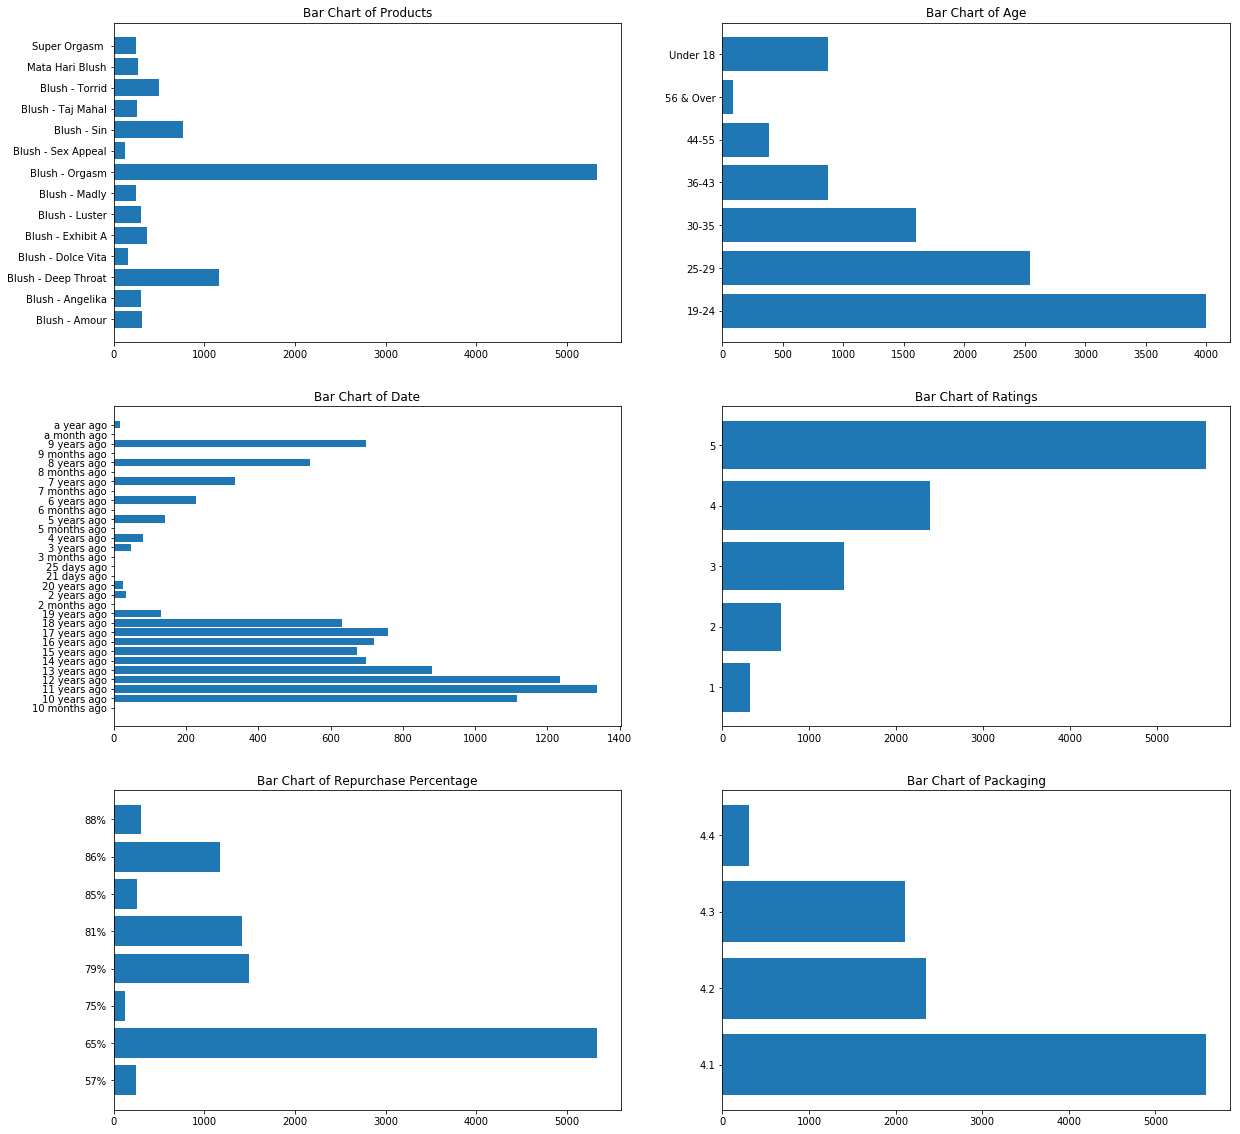

In [18]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].astype(str).value_counts().sort_index().index,products['packaging'].astype(str).value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text Data Exploration

In [19]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [20]:
# Check for random sample of reviews
pd.set_option('display.max_colwidth', 200)
products['review'].sample(n=10)

3453    I loved this blush and used it for ages, also in combination with Nars Mata Hari (a deep rosy shade) blush as demoed on me at Mecca Cosmetica. Easy to wear as a 'no-make-up' look too. I used it wi...
3817    I love this product!  It seems to be universally flattering, and on my warm, medium toned skin, it looks fantastic!  Like, in someone else's words "you've been wromping around the room for hours."...
1134    My fave blusher ever!! It's just perfect, a bit on the pricey side but its amazing! they're are a couple of dupes i've found for it in superdrug (which I can't remember at the moment, I will edit ...
9109    A gorgeous sandy apricot blush! No pink whatsoever here, it's a straight-up warm shade with microshimmer and that incomparable NARS texture. Easy to blend, looks simply great and hard to overdo.\r...
1417    I quite like this blush, it gives a nice peachy gold shimmer to the cheeks and it blends very smoothly. But if I apply it in the morning, by the afternoon there

count    10351.000000
mean       449.610859
std        348.451299
min          0.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       6000.000000
Name: review_length, dtype: float64


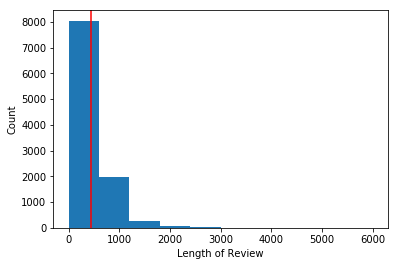

In [21]:
products['review_length'] = products['review'].apply(lambda x: len(x.strip()))
plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis, average of 450 words

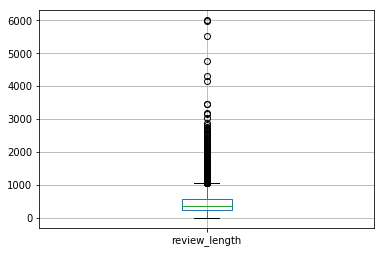

In [22]:
# Check for presence of outliers
products.boxplot('review_length')

In [23]:
# Explore the reviews that have very long lengths
products[products['review_length'] > 3000]

product           user_id    age          date  \
51          Blush - Orgasm      valmont32677  36-43   3 years ago   
550         Blush - Orgasm           Labloah  36-43   8 years ago   
2823        Blush - Orgasm      strawberita1  30-35  12 years ago   
2855        Blush - Orgasm     lipglosseater  19-24  12 years ago   
3085        Blush - Orgasm        gingerrama  30-35  13 years ago   
5455   Blush - Deep Throat           genarod  25-29   8 years ago   
6022   Blush - Deep Throat     lipglosseater  19-24  12 years ago   
7653    Blush - Dolce Vita  storybookheroine  30-35  12 years ago   
8190     Blush - Taj Mahal         scarski91  25-29   4 years ago   
8642     Blush - Exhibit A            J_cool  25-29  12 years ago   
10043       Blush - Torrid     lipglosseater  19-24  12 years ago   

                                                                                                                                                                                                        review  \
51     The “Markle Sparkle” prevails! Meghan Markle loves this blush (the duchess of Sussex). And it’s easy to see why! It’s a super easy to wear peachy golden sheen. It gives my face light. I bought thi...   
550    Yes, it's a hyped product, but after trying this, I can certainly see why people adore it.\r\n\r\nI must admit, it took me a while to actually splurge and buy this, as I couldn't justify spending ...   
2823   I am very sad that I waited so long to purchase this blush. I will break down why I adore it so much. I apologize in advance for this long review although I hope it is informative.\r\n\r\n\r\nColo...   
2855   *Click on "Continued>>" to view pics / full review*\r\n\r\n<img src="http://i100.photobucket.com/albums/m35/medagreat/orgasm.jpg" />\r\n\r\n<b><u>At a Glance:</u></b>\r\n<b>Price:</b> US$25 (appro...   
3085   UPDATE: Well, it's very nice, but there are now plenty of Orgasmalikes out there, and plenty that don't irritate or make pores look big or glittery. But I'll leave this up, as my first proper blus...   
5455   This is a very easy blush to fall in love with.\r\n\r\nI guess to start I will say that I am light skinned, a nc15-20, with medium brown hair/eyes.  I have a slight olive undertone, but mostly jus...   
6022   *Click on "Continued>>" to view pics / full review*\r\n\r\n<img src="http://i100.photobucket.com/albums/m35/medagreat/Narsdeepthroat.jpg" />\r\n\r\n<b><u>At a Glance:</u></b>\r\n<b>Price:</b> US$2...   
7653        When the first pictures of Dolce Vita popped up on the internet I have to admit I was disappointed.  It was dark, muddy, matte and did nothing to make me want it.  Now I LOVE Dolce Vita lipst...   
8190   Skin ref: Lancome Teint Miracle in #005 Beige Ivory. Very fair -fair skin with warm yellow/gold undertones. Golden blonde hair warm honey-like blonde highlights, hazel eyes (brown-green) that chan...   
8642   Upon reading dozens of reviews on NARS’ Exhibit A blush, I was really excited about purchasing it. After several days of using the product, I can honestly say that it is, indeed, different than an...   
10043  *Click on "Continued>>" to view pics / full review*\r\n\r\n<img src="http://i100.photobucket.com/albums/m35/medagreat/torrid.jpg" />\r\n\r\n<b><u>At a Glance:</u></b>\r\n<b>Price:</b> US$25 (appro...   

       ratings repurchase  packaging  price  review_length  
51         5.0        65%        4.1      4           4317  
550        5.0        65%        4.1      4           3463  
2823       5.0        65%        4.1      4           3033  
2855       4.0        65%        4.1      4           5991  
3085       3.0        65%        4.1      4           5519  
5455       4.0        81%        4.2      4           3151  
6022       5.0        81%        4.2      4           6000  
7653       4.0        79%        4.3      4           3183  
8190       5.0        85%        4.2      4           3450  
8642       1.0        86%        4.3      4           4149 

In [24]:
# Check for number of rows that contains "*Click on "Continued>>"
products['review'].str.contains('\*Click on "Continued>>').sum()

3

In [25]:
# Remove reviews that contains "*Click on "Continued>>"
products = products[~products['review'].str.contains('\*Click on "Continued>>')]

In [26]:
# Check for review with 0 length
products[products['review_length'] == 0]

product        user_id       age         date      review  \
466  Blush - Orgasm  oppositeofdog  Under 18  7 years ago               

     ratings repurchase  packaging  price  review_length  
466      5.0        65%        4.1      4              0

In [27]:
# Remove the review 
products = products[products['review_length'] > 0]

In [28]:
# Check for current min review length
products['review_length'].describe()

count    10347.000000
mean       448.163816
std        337.172719
min          4.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       5519.000000
Name: review_length, dtype: float64

In [29]:
# Check for review with small length to see if sufficient for analysis
products[products['review_length'] <= 10]

product            user_id       age          date  \
26         Blush - Orgasm           Abelaine     36-43   2 years ago   
126        Blush - Orgasm     AnnaScrimgeour     25-29   5 years ago   
274        Blush - Orgasm           linehmor     19-24   6 years ago   
512        Blush - Orgasm  mariacristinatoca     36-43   7 years ago   
1565       Blush - Orgasm               Odaa     19-24  10 years ago   
2953       Blush - Orgasm           lisagibb     25-29  13 years ago   
3067       Blush - Orgasm             car123     19-24  13 years ago   
3891       Blush - Orgasm    princesslori431     19-24  15 years ago   
3967       Blush - Orgasm            Acnetha  Under 18  15 years ago   
4005       Blush - Orgasm          strony123     25-29  15 years ago   
4522       Blush - Orgasm        PurpleFairy     19-24  16 years ago   
5724  Blush - Deep Throat       AshLovePeace     25-29  10 years ago   
8993       Blush - Luster            doris98     36-43  11 years ago   

          review  ratings repurchase  packaging  price  review_length  
26     I love it      5.0        65%        4.1      4              9  
126        Good       5.0        65%        4.1      4              4  
274    its okey.      4.0        65%        4.1      4              9  
512    Amazing!       5.0        65%        4.1      4              8  
1565     Love <3      5.0        65%        4.1      4              7  
2953    love it!      5.0        65%        4.1      4              8  
3067    love it!      5.0        65%        4.1      4              8  
3891     LOVE IT      5.0        65%        4.1      4              7  
3967      its ok      3.0        65%        4.1      4              6  
4005      Great!      3.0        65%        4.1      4              6  
4522   Love this      5.0        65%        4.1      4              9  
5724  Love it :)      4.0        81%        4.2      4             10  
8993    Love it!      4.0        88%        4.2      4              8

In [30]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

In [31]:
products['english'].value_counts()

True     10323
False       24
Name: english, dtype: int64

In [32]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

product            user_id    age          date  \
888        Blush - Orgasm  Oilyacneproneskin  36-43   9 years ago   
7776        Super Orgasm          kathrynb23  19-24  11 years ago   
880        Blush - Orgasm          Lucyrosee  19-24   9 years ago   
2772       Blush - Orgasm             Nokomi  30-35  12 years ago   
5801  Blush - Deep Throat          starrysim  25-29  11 years ago   

                                                                                                                                                                                                       review  \
888   I was pulled in by the hype.  It was the first blush I ever bought with money and I was very disappointed.  First off, there are sparkle in there!  For such an expensive product, I would expect th...   
7776  I was not impress with super orgasm at all, and that is really disappointing. It had really massive particles of gold glitter, usually with blush I like to layer it on if I find I need the colour ...   
880                                                                                                      Wasn't too confident when purchasing that this would match my skin tone but fell in love!!! love it!   
2772  I love Nars, I love this blush.  There are a lot of dupes out there that are very good but something about having the real thing is more fun.  I think I might like Deep Throat better though. I pre...   
5801  At last!  NARS blush success.  After the epic failure that was Torrid, I was a little wary of picking up another peachy NARS blush, but none of the pinks really appeal to me, and I was determined ...   

      ratings repurchase  packaging  price  review_length  english  
888       2.0        65%        4.1      4            475     True  
7776      2.0        57%        4.1      4            419     True  
880       5.0        65%        4.1      4            100     True  
2772      5.0        65%        4.1      4            210     True  
5801      5.0        81%        4.2      4            449     True

In [33]:
# Check to see which review are wrongly classified as english == False
products[products['english'] == False]

product            user_id       age          date  \
23         Blush - Orgasm              mixen     25-29   2 years ago   
26         Blush - Orgasm           Abelaine     36-43   2 years ago   
126        Blush - Orgasm     AnnaScrimgeour     25-29   5 years ago   
512        Blush - Orgasm  mariacristinatoca     36-43   7 years ago   
580        Blush - Orgasm           Marivale     36-43   8 years ago   
1565       Blush - Orgasm               Odaa     19-24  10 years ago   
2447       Blush - Orgasm           AllieRae     19-24  12 years ago   
2919       Blush - Orgasm          jalovette     30-35  12 years ago   
2953       Blush - Orgasm           lisagibb     25-29  13 years ago   
3067       Blush - Orgasm             car123     19-24  13 years ago   
3702       Blush - Orgasm            beachbb     19-24  14 years ago   
3967       Blush - Orgasm            Acnetha  Under 18  15 years ago   
4338       Blush - Orgasm     pittsburghdiva     30-35  16 years ago   
4395       Blush - Orgasm          meisocute     19-24  16 years ago   
4420       Blush - Orgasm          STACEYFFF     30-35  16 years ago   
4554       Blush - Orgasm       DELILAHIZ1ST     19-24  16 years ago   
5132       Blush - Orgasm             nars37  Under 18  18 years ago   
6395  Blush - Deep Throat       Rebelgirl007     19-24  17 years ago   
6740          Blush - Sin           Anette34     30-35  13 years ago   
7069          Blush - Sin             Souris     25-29  17 years ago   
7285        Blush - Madly           MiriamNJ     36-43   7 years ago   
8205    Blush - Taj Mahal           MiriamNJ     36-43   7 years ago   
8542    Blush - Exhibit A           mimihoco     44-55  10 years ago   
8675    Blush - Exhibit A         CraxFactor     25-29  14 years ago   

                                                                                                                                                                                                       review  \
23                                                                                                                                                                                               Best colour!   
26                                                                                                                                                                                                  I love it   
126                                                                                                                                                                                                     Good    
512                                                                                                                                                                                                 Amazing!    
580   Es uno de mis blush preferidos, de un tono rosado muy sentador que se funde bien con la piel.  Es apropiado para tonos de piel claros a medios, y tiene un shimmer que ilumina la piel dÃ¡ndole un t...   
1565                                                                                                                                                                                                  Love <3   
2447                                                                                                                                                                                          love love LOVE!   
2919                                                                                                                                                                                         Excellent colour   
2953                                                                                                                                                                                                 love it!   
3067                                                                                                                           

In [34]:
# Drop Non-English reviews
not_eng = [580, 7285, 8205]
products = products.drop(index=not_eng)
products = products.drop(['english'],axis=1)

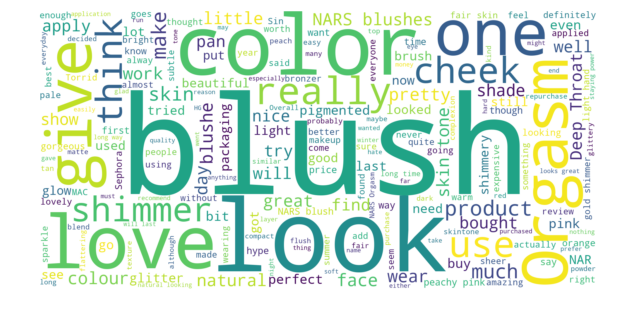

In [35]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
# Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

#Most common words are stop-words and a domain specific word (blush)

word  occurences
1754        I      22396.0
3347        a      14059.0
3588      and      13421.0
10052     the      12466.0
6893       it      10855.0
6883       is       7768.0
10153      to       7718.0
10087    this       7283.0
4252      but       7013.0
7664       my       6571.0
7902       on       6009.0
7870       of       5267.0
6005      for       5105.0
4057    blush       4795.0
1823       It       4477.0
10777    with       4295.0
6723       in       4043.0
10049    that       3979.0
9478       so       3530.0
7800      not       3145.0

# Non-Text Data Pre-processing

In [37]:
# Drop not useful columns
products.drop(columns=['price','user_id'], inplace=True)

In [38]:
# Drop data from more than 13 years ago and regroup 'months ago' rows to 'a year ago'
# Drop older years and group months to first year
products['date'] = products['date'].apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date'] = products['date'].apply(lambda x: 1 if x=='a' else int(x))
products['date'] = products['date'].apply(lambda x: -int(x))
products = products[products['date'] >= -13]

# Convert date column to year for better readability
products['date'] = products['date'].apply(lambda x: 2021 + x)

In [39]:
# Check if the dates are formatted correctly
products['date'].value_counts()

2010    1337
2009    1233
2011    1117
2008     880
2012     699
2013     541
2014     333
2015     228
2016     141
2017      81
2018      48
2019      34
2020      34
Name: date, dtype: int64

In [40]:
# Convert repurchase column to numerical
products['repurchase'] = products['repurchase'].apply(lambda x : float(x.strip('%'))/100)

In [41]:
# Relabel 'ratings' column to repurchase again (1) if ratings 4/5 else won't repurchase again (0)
products['repurchase_again'] = products['ratings'].apply(lambda x: 0 if x < 4 else 1 )
products.drop(['ratings'], axis=1, inplace=True)
products.head()

product    age  date  \
0  Blush - Orgasm  36-43  2020   
1  Blush - Orgasm  44-55  2020   
2  Blush - Orgasm  30-35  2020   
3  Blush - Orgasm  44-55  2020   
4  Blush - Orgasm  30-35  2020   

                                                                                                                                                                                                    review  \
0  This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...   
1  This blush is a beautiful color.  It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...   
2  After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...   
3  I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush.  I love the shimmer on my cheek bones and temples and use Clin...   
4  I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...   

   repurchase  packaging  review_length  repurchase_again  
0        0.65        4.1            565                 1  
1        0.65        4.1            574                 0  
2        0.65        4.1            331                 1  
3        0.65        4.1            893                 1  
4        0.65        4.1            331                 1

In [42]:
products['repurchase_again'].value_counts()
# No need to account for class imbalance

1    5075
0    1631
Name: repurchase_again, dtype: int64

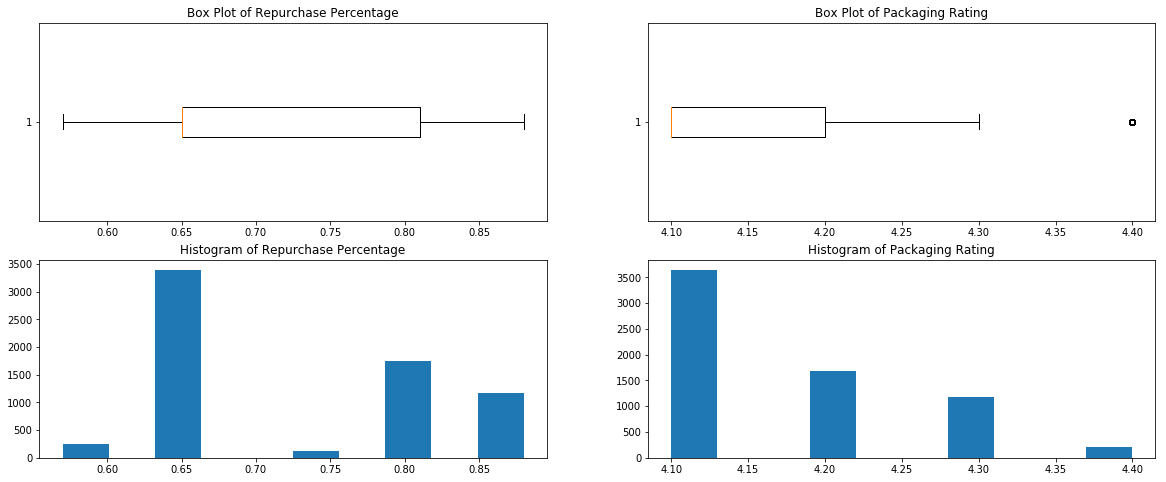

In [43]:
# Boxplot and histogram of Repurchase and Packaging columns
fig, ax = plt.subplots(2,2,figsize=(20,8))
ax[0,0].boxplot(products['repurchase'],vert=False)
ax[0,0].title.set_text('Box Plot of Repurchase Percentage')
ax[1,0].hist(products['repurchase'])
ax[1,0].title.set_text('Histogram of Repurchase Percentage')
ax[0,1].boxplot(products['packaging'],vert=False)
ax[0,1].title.set_text('Box Plot of Packaging Rating')
ax[1,1].hist(products['packaging'])
ax[1,1].title.set_text('Histogram of Packaging Rating')

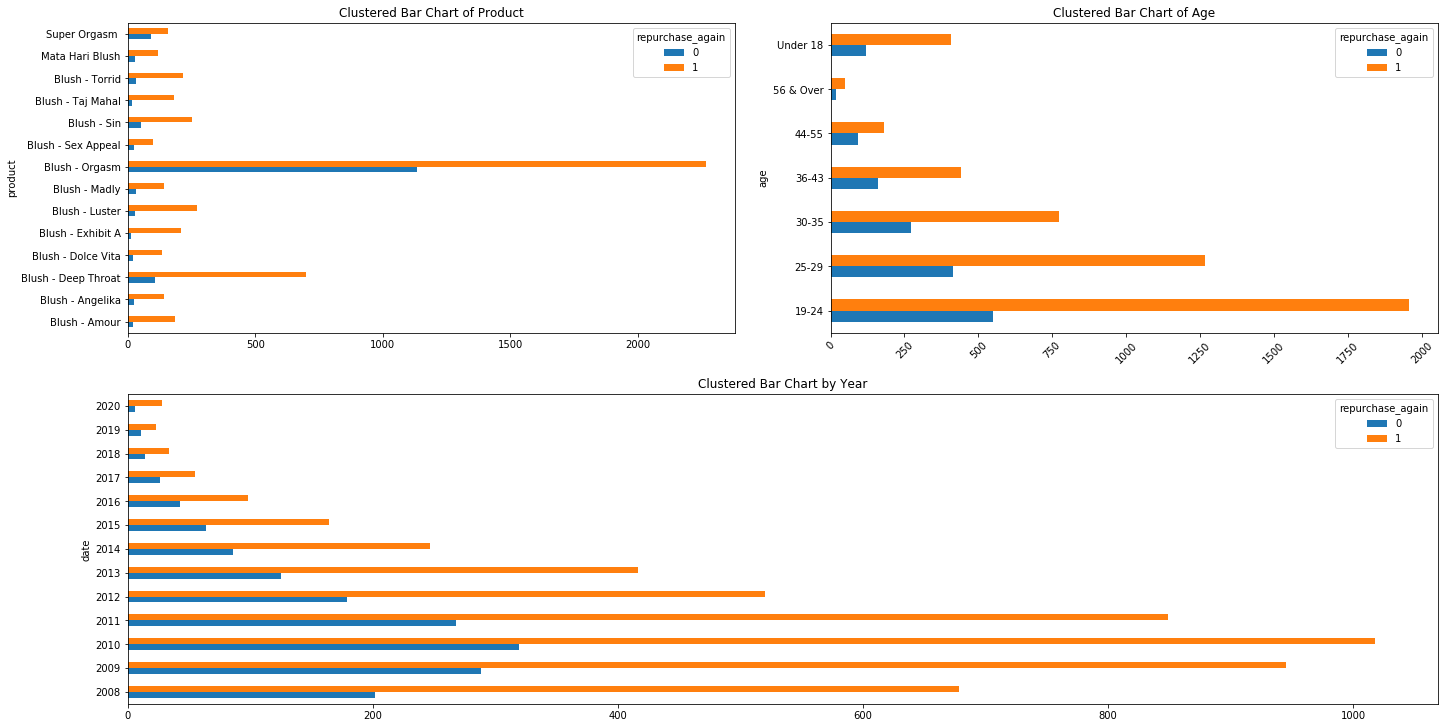

In [44]:
# Plot distribution for Product, Age, Date, Repurchase and Packaging
fig = plt.figure(figsize=(20,10),constrained_layout=True)
gs = gridspec.GridSpec(2,2,figure=fig)
ax1 = fig.add_subplot(gs[0,0])
products.groupby(['product','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax1)
ax1.title.set_text('Clustered Bar Chart of Product')
ax1.tick_params(axis='x', labelrotation=0)

ax2 = fig.add_subplot(gs[0,1])
products.groupby(['age','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax2)
ax2.title.set_text('Clustered Bar Chart of Age')
ax2.tick_params(axis='x', labelrotation=45)

ax3 = fig.add_subplot(gs[1,:])
products.groupby(['date','repurchase_again'])['repurchase_again'].count().sort_index().unstack().plot(kind='barh',ax=ax3)
ax3.title.set_text('Clustered Bar Chart by Year')
ax3.tick_params(axis='x', labelrotation=0)

# Generally, most people are willing to repurchase in every category

C:\Users\Gladys Koh\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


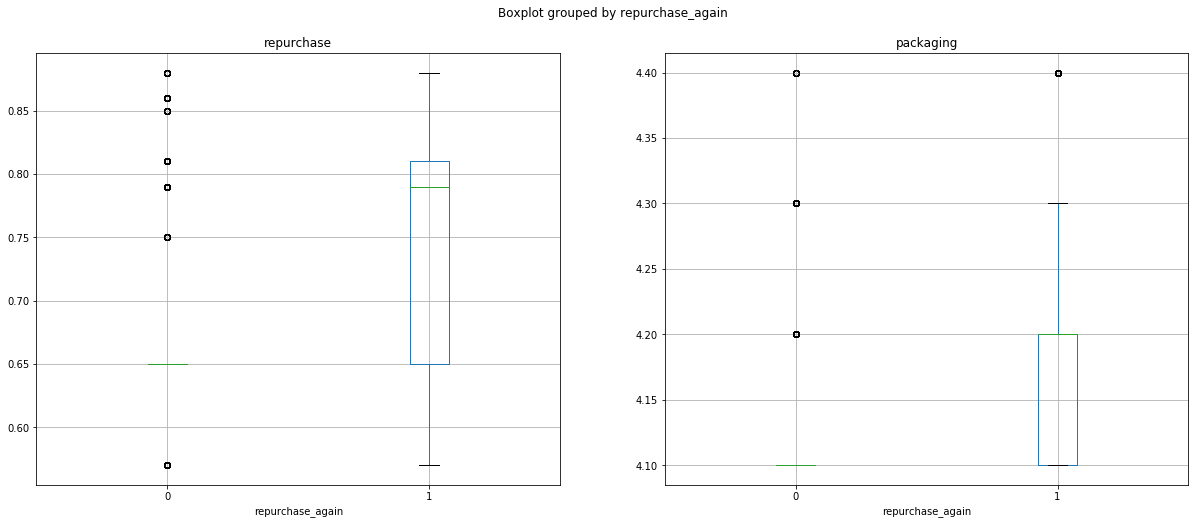

In [45]:
# Boxplot of repurchase and packaging attributes by repurchase_again
fig, ax = plt.subplots(1,2,figsize=(20,8))
products.boxplot('repurchase', by='repurchase_again', ax=ax[0])
products.boxplot('packaging', by='repurchase_again', ax=ax[1])
# Those likely to repurchase again have give higher repurchase ratings and packaging ratings

In [46]:
products.corr()

date  repurchase  packaging  review_length  \
date              1.000000   -0.035592  -0.028083       0.042245   
repurchase       -0.035592    1.000000   0.826750       0.079045   
packaging        -0.028083    0.826750   1.000000       0.081031   
review_length     0.042245    0.079045   0.081031       1.000000   
repurchase_again -0.030943    0.239467   0.203778       0.011251   

                  repurchase_again  
date                     -0.030943  
repurchase                0.239467  
packaging                 0.203778  
review_length             0.011251  
repurchase_again          1.000000

# Text Data Preprocessing

In [47]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob, Word

[nltk_data] Downloading package stopwords to C:\Users\Gladys
[nltk_data]     Koh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gladys
[nltk_data]     Koh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
# Remove line breaks
def remove_breaks(text):
  text = re.sub(r'\r', '', text)
  return re.sub(r'\n', '', text)

products['review_processed'] = products['review'].apply(lambda x: remove_breaks(x))

In [49]:
# Remove links
def remove_urls(text):
  text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
  text = re.sub(r'[^\s]+.com', '', text)
  return re.sub(r'www.[^\s]+', '', text)

products['review_processed'] = products['review_processed'].apply(lambda x: remove_urls(x))

In [50]:
# Covert to lowercase
products['review_processed'] = products['review_processed'].apply(lambda x: x.lower())

In [51]:
# Expand Contractions
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Function to perform expansion of contractions
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

products['review_processed'] = products['review_processed'].apply(lambda x : expand_contractions(x,contractions_dict))

In [52]:
# Remove punctuations
products['review_processed'] = products['review_processed'].str.replace('[^\w\s]',' ')

# Remove digits (including words that contain digits because makeup products)
products['review_processed'] = products['review_processed'].apply(lambda x: re.sub('\w*\d\w*',' ', x))

# Lemmatization
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))

# Remove extra whitespaces
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join(x.split()))

In [53]:
# Check sample of preprocessed reviews
products[['review', 'review_processed']].sample(n=5)

review  \
8990  This is one of NARS's best blush color.  I love how it gives my nc37-40 skin a healthy looking glow and sunkissed effect without it looking unnatural.  The blush looks unremarkable in the pan but ...   
1134  My fave blusher ever!! It's just perfect, a bit on the pricey side but its amazing! they're are a couple of dupes i've found for it in superdrug (which I can't remember at the moment, I will edit ...   
5717  A lovely color, its actually about three shades lighter than orgasm and minus the glitter, as reviewers have stated.  Its a good option to have, a lighter but buildable and very pretty peachy pink...   
8217  HOLY taledo.. I am in freakin' love. I am a light/med olive skin toned gal (NC25 for ref, maybe a little lighter in the winter). I just bought this on a whim because I have been on an orange blush...   
7572                                                                                  Beautiful rosy colour! Highly pigmented. Nothing life changing since I don't really wear blush nor eyeshadows everyday.   

                                                                                                                                                                                             review_processed  
8990  this is one of narss best blush color i love how it give my skin a healthy looking glow and sunkissed effect without it looking unnatural the blush look unremarkable in the pan but once on my chee...  
1134  my fave blusher ever it is just perfect a bit on the pricey side but it amazing they are are a couple of dupe i have found for it in superdrug which i cannot remember at the moment i will edit if ...  
5717  a lovely color it actually about three shade lighter than orgasm and minus the glitter a reviewer have stated it a good option to have a lighter but buildable and very pretty peachy pink tone love...  
8217  holy taledo i am in freakin love i am a light med olive skin toned gal for ref maybe a little lighter in the winter i just bought this on a whim because i have been on an orange blush kick a few w...  
7572                                                                                     beautiful rosy colour highly pigmented nothing life changing since i do not really wear blush nor eyeshadow everyday

# Feature Engineering

In [54]:
from sklearn import preprocessing
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to C:\Users\Gladys
[nltk_data]     Koh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
# Conduct One-hot Encoding for Product and Age because they are nominal data (have to remove 1 dummy variable column to remove multi-collinearity problem)
products = pd.concat([products, pd.get_dummies(products['product'], prefix='product', drop_first=True)], axis=1)
products = pd.concat([products, pd.get_dummies(products['age'], prefix='age', drop_first=True)], axis=1)
products.drop(columns=['product','age'], inplace=True)

In [56]:
# Normalize the numerical columns so that the data remains in its proportional distribution (data distribution is not gaussian so cannot use standardization)
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Normalize the numeric columns
products[['repurchase','packaging']] = scaler.fit_transform(products[['repurchase','packaging']])

In [57]:
products.describe()

date   repurchase    packaging  review_length  repurchase_again  \
count  6706.000000  6706.000000  6706.000000    6706.000000       6706.000000   
mean   2010.903668     0.502958     0.230639     486.307188          0.756785   
std       2.360430     0.300575     0.288007     365.659387          0.429056   
min    2008.000000     0.000000     0.000000       4.000000          0.000000   
25%    2009.000000     0.258065     0.000000     250.000000          1.000000   
50%    2010.000000     0.258065     0.000000     401.000000          1.000000   
75%    2012.000000     0.774194     0.333333     614.000000          1.000000   
max    2020.000000     1.000000     1.000000    5519.000000          1.000000   

       product_Blush - Angelika  product_Blush - Deep Throat  \
count               6706.000000                  6706.000000   
mean                   0.024903                     0.120191   
std                    0.155841                     0.325209   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                    1.000000                     1.000000   

       product_Blush - Dolce Vita  product_Blush - Exhibit A  \
count                 6706.000000                6706.000000   
mean                     0.023114                   0.033403   
std                      0.150276                   0.179700   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      1.000000                   1.000000   

       product_Blush - Luster  ...  product_Blush - Taj Mahal  \
count             6706.000000  ...                6706.000000   
mean                 0.044736  ...                   0.029675   
std                  0.206739  ...                   0.169702   
min                  0.000000  ...                   0.000000   
25%                  0.000000  ...                   0.000000   
50%                  0.000000  ...                   0.000000   
75%                  0.000000  ...                   0.000000   
max                  1.000000  ...                   1.000000   

       product_Blush - Torrid  product_Mata Hari Blush  product_Super Orgasm   \
count             6706.000000              6706.000000            6706.000000   
mean                 0.037131                 0.021772               0.037131   
std                  0.189097                 0.145948               0.189097   
min                  0.000000                 0.000000               0.000000   
25%                  0.000000                 0.000000               0.000000   
50%                  0.000000                 0.000000               0.000000   
75%                  0.000000                 0.000000               0.000000   
max                  1.000000                 1.000000               1.000000   

         age_25-29    age_30-35    age_36-43    age_44-55  age_56 & Over  \
count  6706.000000  6706.000000  6706.000000  6706.000000    6706.000000   
mean      0.250969     0.155681     0.089919     0.041008       0.010289   
std       0.433603     0.362580     0.286088     0.198324       0.100920   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     0.000000     0.000000       0.000000   
50%       0.000000     0.000000     0.000000     0.000000       0.000000   
75%       1.000000     0.000000     0.000000     0.000000       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       age_Under 18  
count   6706.000000  
mean       0.078288  
std        0.268644  
min        0.000000  
25%        0.000000

In [58]:
# Initialise VADER Sentiment Analyser
analyzer = SentimentIntensityAnalyzer()

In [59]:
# Create new features
products['polarity'] = products['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
products['subjectivity'] = products['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
products['word_count'] = products['review_processed'].apply(lambda x: len(str(x).split(" ")))
products['char_count'] = products['review_processed'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
products['avg_word_length'] = products['char_count'] / products['word_count']

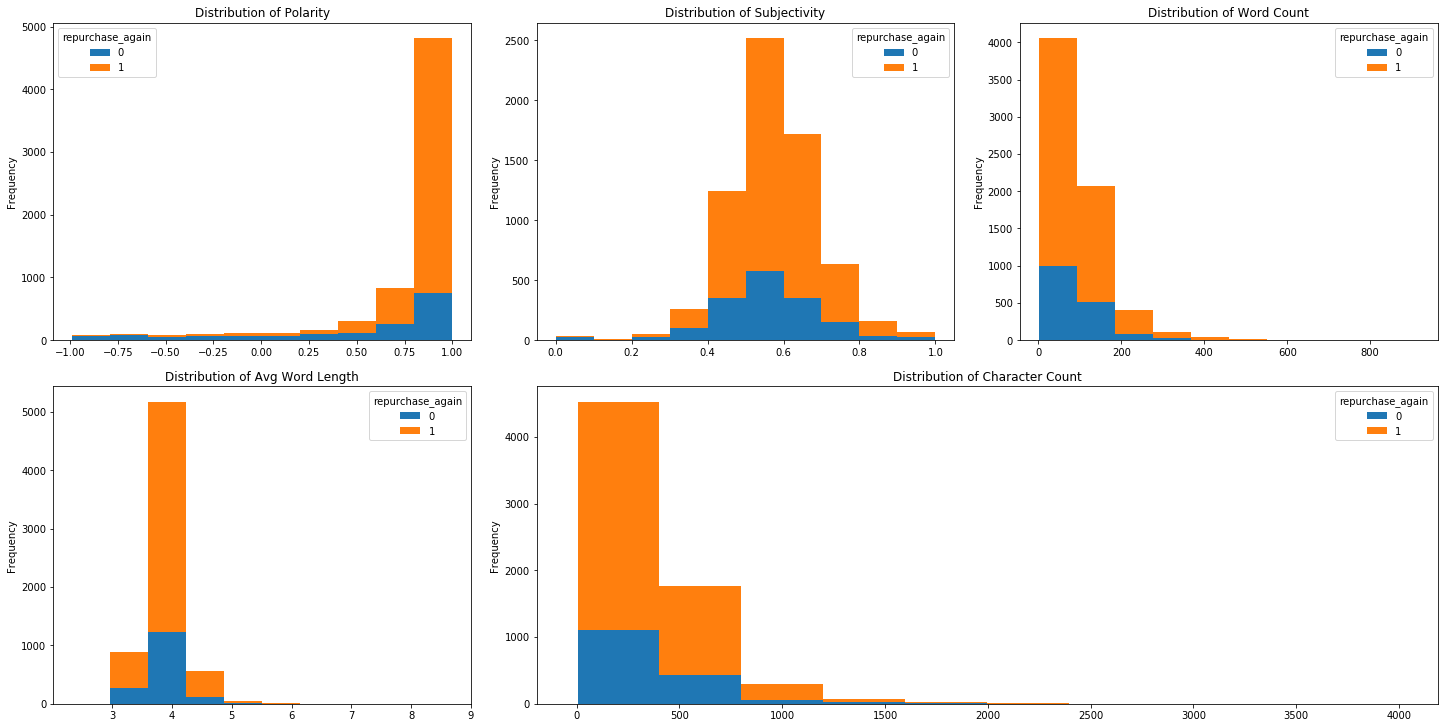

In [60]:
# Histogram of new features
fig = plt.figure(figsize=(20,10),constrained_layout=True)
gs = gridspec.GridSpec(2,3,figure=fig)
ax1 = fig.add_subplot(gs[0,0])
products.pivot(columns='repurchase_again').polarity.plot(kind = 'hist',stacked=True,ax=ax1)
ax1.title.set_text('Distribution of Polarity')

ax2 = fig.add_subplot(gs[0,1])
products.pivot(columns='repurchase_again').subjectivity.plot(kind = 'hist',stacked=True, ax=ax2)
ax2.title.set_text('Distribution of Subjectivity')

ax3 = fig.add_subplot(gs[0,2])
products.pivot(columns='repurchase_again').word_count.plot(kind = 'hist',stacked=True,ax=ax3)
ax3.title.set_text('Distribution of Word Count')

ax4 = fig.add_subplot(gs[1,0])
products.pivot(columns='repurchase_again').avg_word_length.plot(kind = 'hist',stacked=True,ax= ax4)
ax4.title.set_text('Distribution of Avg Word Length')

ax5 = fig.add_subplot(gs[1,1:])
products.pivot(columns='repurchase_again').char_count.plot(kind = 'hist',stacked=True,ax=ax5)
ax5.title.set_text('Distribution of Character Count')

# Similar distributions across the different target value

C:\Users\Gladys Koh\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


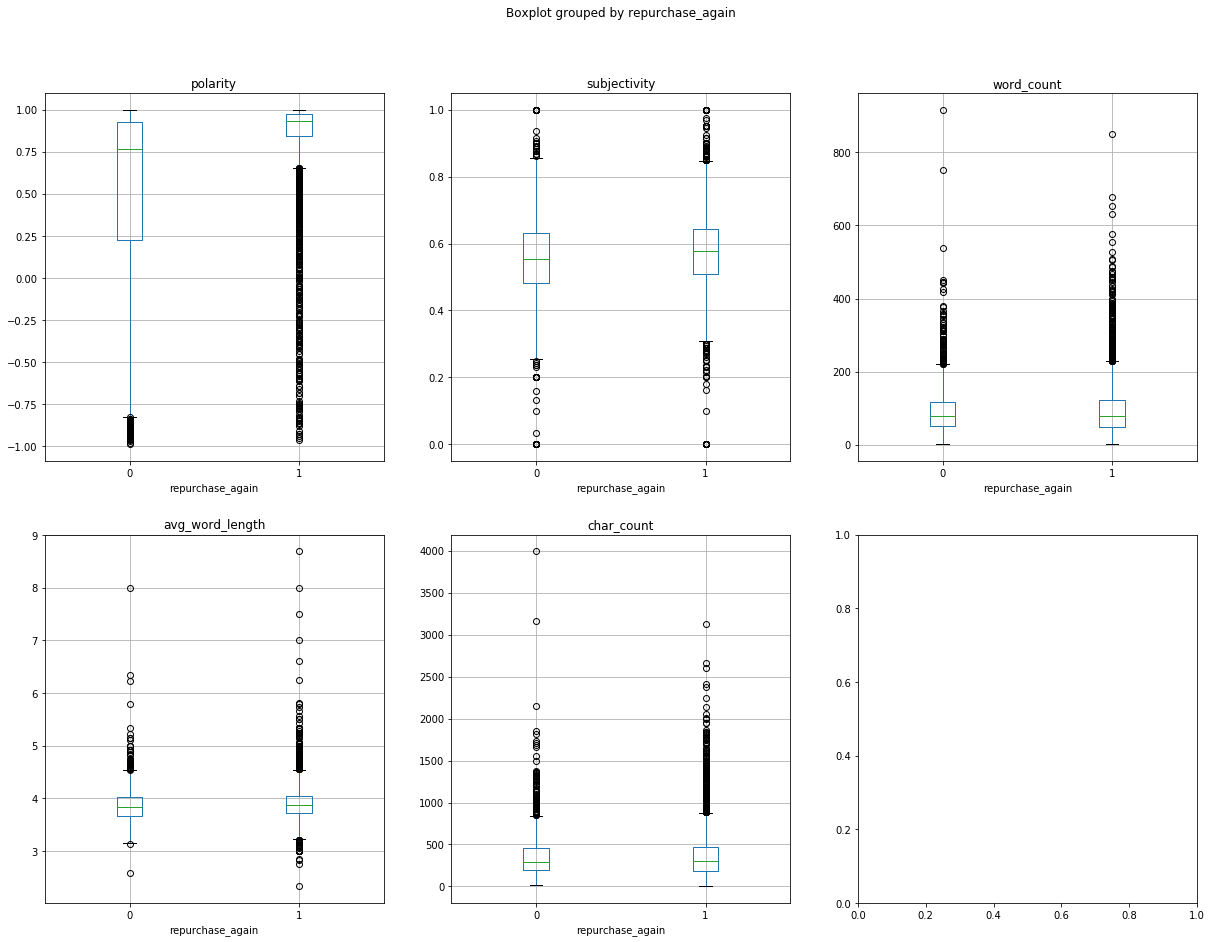

In [61]:
# Boxplot of new features
fig, ax = plt.subplots(2,3,figsize=(20,15))
products.boxplot('polarity',by='repurchase_again',ax=ax[0,0])
products.boxplot('subjectivity',by='repurchase_again',ax=ax[0,1])
products.boxplot('word_count',by='repurchase_again',ax=ax[0,2])
products.boxplot('avg_word_length',by='repurchase_again',ax=ax[1,0])
products.boxplot('char_count',by='repurchase_again',ax=ax[1,1])
# Those who repurchase again have higher polarity, higher subjectivity, similar word count, similar character count, higher average word length compared to those who don't repurchase again

In [62]:
# Normalize word_count, avg_word_length and char_count columns
products[['word_count','avg_word_length','char_count']] = scaler.fit_transform(products[['word_count','avg_word_length','char_count']])

In [63]:
products.describe()

date   repurchase    packaging  review_length  repurchase_again  \
count  6706.000000  6706.000000  6706.000000    6706.000000       6706.000000   
mean   2010.903668     0.502958     0.230639     486.307188          0.756785   
std       2.360430     0.300575     0.288007     365.659387          0.429056   
min    2008.000000     0.000000     0.000000       4.000000          0.000000   
25%    2009.000000     0.258065     0.000000     250.000000          1.000000   
50%    2010.000000     0.258065     0.000000     401.000000          1.000000   
75%    2012.000000     0.774194     0.333333     614.000000          1.000000   
max    2020.000000     1.000000     1.000000    5519.000000          1.000000   

       product_Blush - Angelika  product_Blush - Deep Throat  \
count               6706.000000                  6706.000000   
mean                   0.024903                     0.120191   
std                    0.155841                     0.325209   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                    1.000000                     1.000000   

       product_Blush - Dolce Vita  product_Blush - Exhibit A  \
count                 6706.000000                6706.000000   
mean                     0.023114                   0.033403   
std                      0.150276                   0.179700   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      1.000000                   1.000000   

       product_Blush - Luster  ...    age_30-35    age_36-43    age_44-55  \
count             6706.000000  ...  6706.000000  6706.000000  6706.000000   
mean                 0.044736  ...     0.155681     0.089919     0.041008   
std                  0.206739  ...     0.362580     0.286088     0.198324   
min                  0.000000  ...     0.000000     0.000000     0.000000   
25%                  0.000000  ...     0.000000     0.000000     0.000000   
50%                  0.000000  ...     0.000000     0.000000     0.000000   
75%                  0.000000  ...     0.000000     0.000000     0.000000   
max                  1.000000  ...     1.000000     1.000000     1.000000   

       age_56 & Over  age_Under 18     polarity  subjectivity   word_count  \
count    6706.000000   6706.000000  6706.000000   6706.000000  6706.000000   
mean        0.010289      0.078288     0.761775      0.573948     0.102045   
std         0.100920      0.268644     0.387656      0.122565     0.075997   
min         0.000000      0.000000    -0.988100      0.000000     0.000000   
25%         0.000000      0.000000     0.771700      0.501262     0.052402   
50%         0.000000      0.000000     0.916900      0.572038     0.085153   
75%         0.000000      0.000000     0.966500      0.641573     0.129913   
max         1.000000      1.000000     0.999500      1.000000     1.000000   

        char_count  avg_word_length  
count  6706.000000      6706.000000  
mean      0.091015         0.245290  
std       0.068846         0.049572  
min       0.000000         0.000000  
25%       0.046173         0.216103  
50%       0.075031         0.241311  
75%       0.114931         0.268959  
max       1.000000         1.000000  

[8 rows x 29 columns]

## Feature Engineering with Twitter Data

In [64]:
twitter_scores = pd.read_csv('data/alltweets_score.csv')
twitter_scores

year_new     vader  subjectivity
0       2008  0.371095      0.459237
1       2009  0.372626      0.475603
2       2010  0.363930      0.490337
3       2011  0.314978      0.483623
4       2012  0.314342      0.471159
5       2013  0.265203      0.455515
6       2014  0.274153      0.439074
7       2015  0.253708      0.426396
8       2016  0.253013      0.419337
9       2017  0.231176      0.413557
10      2018  0.307571      0.429923
11      2019  0.342758      0.425779
12      2020  0.360757      0.422651

In [65]:
# Create empty columns for Twitter sentiment and subjectivity
products['twitter_sentiment'] = 0
products['twitter_subjectivity'] = 0

In [66]:
# Add scores to each year
products_groups = products.groupby(['date'])
products_groups = [products_groups.get_group(x) for x in products_groups.groups]

for group in products_groups:
    year = group.iloc[0]['date']
    products.loc[products['date'] == year,'twitter_sentiment'] = twitter_scores.loc[twitter_scores['year_new'] == year, 'vader'].values[0]
    products.loc[products['date'] == year,'twitter_subjectivity'] = twitter_scores.loc[twitter_scores['year_new'] == year, 'subjectivity'].values[0]

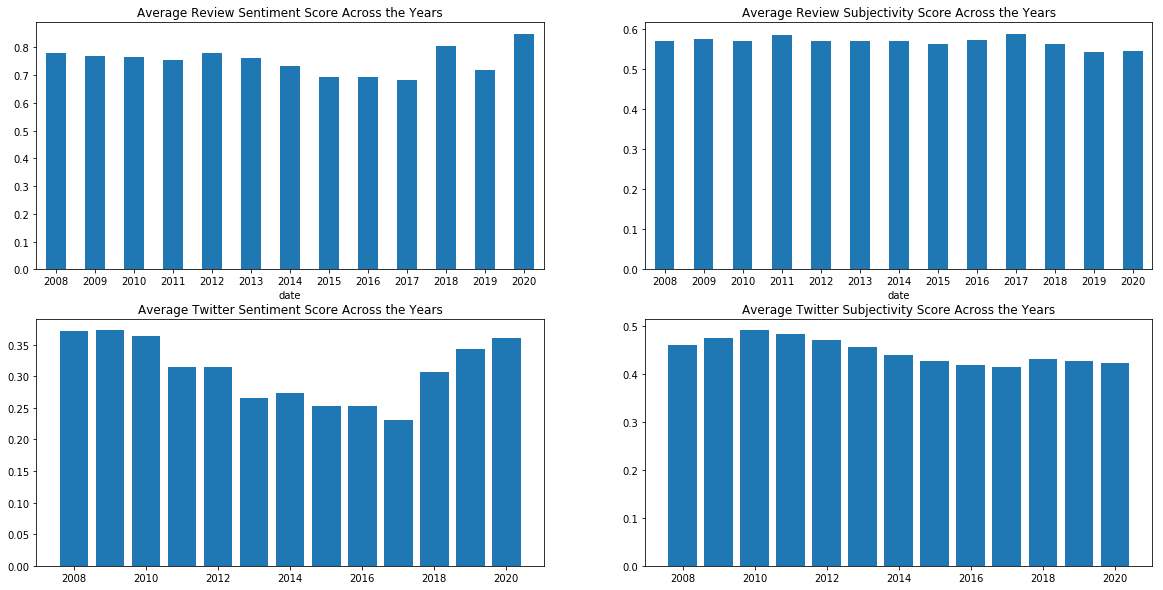

In [67]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
products.groupby(['date'])['polarity'].mean().plot(kind='bar',ax=ax[0,0])
ax[0,0].title.set_text('Average Review Sentiment Score Across the Years')
ax[0,0].tick_params(axis='x', labelrotation=0)
products.groupby(['date'])['subjectivity'].mean().plot(kind='bar',ax=ax[0,1])
ax[0,1].title.set_text('Average Review Subjectivity Score Across the Years')
ax[0,1].tick_params(axis='x', labelrotation=0)
ax[1,0].bar(products['date'],products['twitter_sentiment'])
ax[1,0].title.set_text('Average Twitter Sentiment Score Across the Years')
ax[1,1].bar(products['date'],products['twitter_subjectivity'])
ax[1,1].title.set_text('Average Twitter Subjectivity Score Across the Years')

In [68]:
products.shape

(6706, 33)

# Train-Test Split

In [69]:
# Remove stopwords
stop = stopwords.words('english')
# Include other words that occur frequently
newStopWords = ['blush','nars','orgasm','colour','color']
stop.extend(newStopWords)
products['review_processed_stop'] = products['review_processed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [70]:
X = products.drop(['repurchase_again','date','review_length'], axis=1)
y = products['repurchase_again']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(5029, 31)
(1677, 31)


In [71]:
# create dictionary which maps each token to its corresponding tf-idf score to get more domain specific stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words= stop, max_df=0.85)
X_train_dtm = vect.fit_transform(X_train['review_processed_stop'])
word2tfidf = dict(zip(vect.get_feature_names(), vect.idf_))
domain_specific_stopwords = sorted(word2tfidf, key = word2tfidf.get)[:30]
stop.extend(domain_specific_stopwords)

In [72]:
X_train_dtm.shape

(5029, 8653)

In [83]:
#Creating another tf-idf vectorizer to do topic modeling
tfidf_vectorizer = TfidfVectorizer(stop_words= stop, min_df=0.04)
X_train_dtm = tfidf_vectorizer.fit_transform(X_train['review_processed_stop'])
X_test_dtm = tfidf_vectorizer.transform(X_test['review_processed_stop'])

In [84]:
X_train_dtm.shape

(5029, 163)

In [85]:
# GridSearch to find right number of topics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Define Search Param
search_params = {
  'n_components': [3, 4, 5, 6, 7, 8, 9, 10],
  'learning_decay': [.5, .7, .9]
}

# Init the Model
lda = LDA(max_iter=5, learning_method='online', learning_offset=50., random_state=0)

# Init Grid Search Class
gridsearch = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
gridsearch.fit(X_train_dtm)

print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 3}
Best Log Likelihood Score:  -18851.34261031355


In [86]:
# Best Model
best_lda_model = gridsearch.best_estimator_

X_train_LDA = best_lda_model.transform(X_train_dtm)
X_test_LDA = best_lda_model.transform(X_test_dtm)

In [87]:
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

In [88]:
### Train Data ###

# index names
docnames_train = ["TrainDoc" + str(i) for i in range(len(X_train))]

# Make the pandas dataframe
df_document_topic_train = pd.DataFrame(np.round(X_train_LDA, 2), columns=topicnames, index=docnames_train)

# Get dominant topic for each document
dominant_topic_train = np.argmax(df_document_topic_train.values, axis=1)
df_document_topic_train['dominant_topic'] = dominant_topic_train
print(df_document_topic_train.head())
print('\nDistribution of topics')
print(df_document_topic_train['dominant_topic'] .value_counts())

           Topic0  Topic1  Topic2  dominant_topic
TrainDoc0    0.10    0.79    0.10               1
TrainDoc1    0.09    0.81    0.09               1
TrainDoc2    0.83    0.09    0.08               0
TrainDoc3    0.12    0.18    0.71               2
TrainDoc4    0.83    0.09    0.08               0

Distribution of topics
0    2821
1    1157
2    1051
Name: dominant_topic, dtype: int64


In [89]:
### Test Data

# index names
docnames_test = ["TestDoc" + str(i) for i in range(len(X_test))]

# Make the pandas dataframe
df_document_topic_test = pd.DataFrame(np.round(X_test_LDA, 2), columns=topicnames, index=docnames_test)

# Get dominant topic for each document
dominant_topic_test = np.argmax(df_document_topic_test.values, axis=1)
df_document_topic_test['dominant_topic'] = dominant_topic_test
print(df_document_topic_test.head())
print('\nDistribution of topics')
print(df_document_topic_test['dominant_topic'] .value_counts())

          Topic0  Topic1  Topic2  dominant_topic
TestDoc0    0.25    0.45    0.30               1
TestDoc1    0.73    0.16    0.12               0
TestDoc2    0.70    0.15    0.15               0
TestDoc3    0.79    0.08    0.13               0
TestDoc4    0.59    0.31    0.10               0

Distribution of topics
0    968
1    355
2    354
Name: dominant_topic, dtype: int64


In [93]:
from sklearn.decomposition import TruncatedSVD
clusters = dominant_topic_train
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(X_train_LDA)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

Text(0.5,1,'Segregation of Topic Clusters')

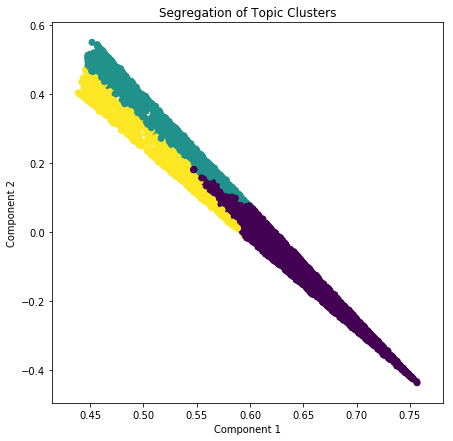

In [94]:
# Plot
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=clusters)
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

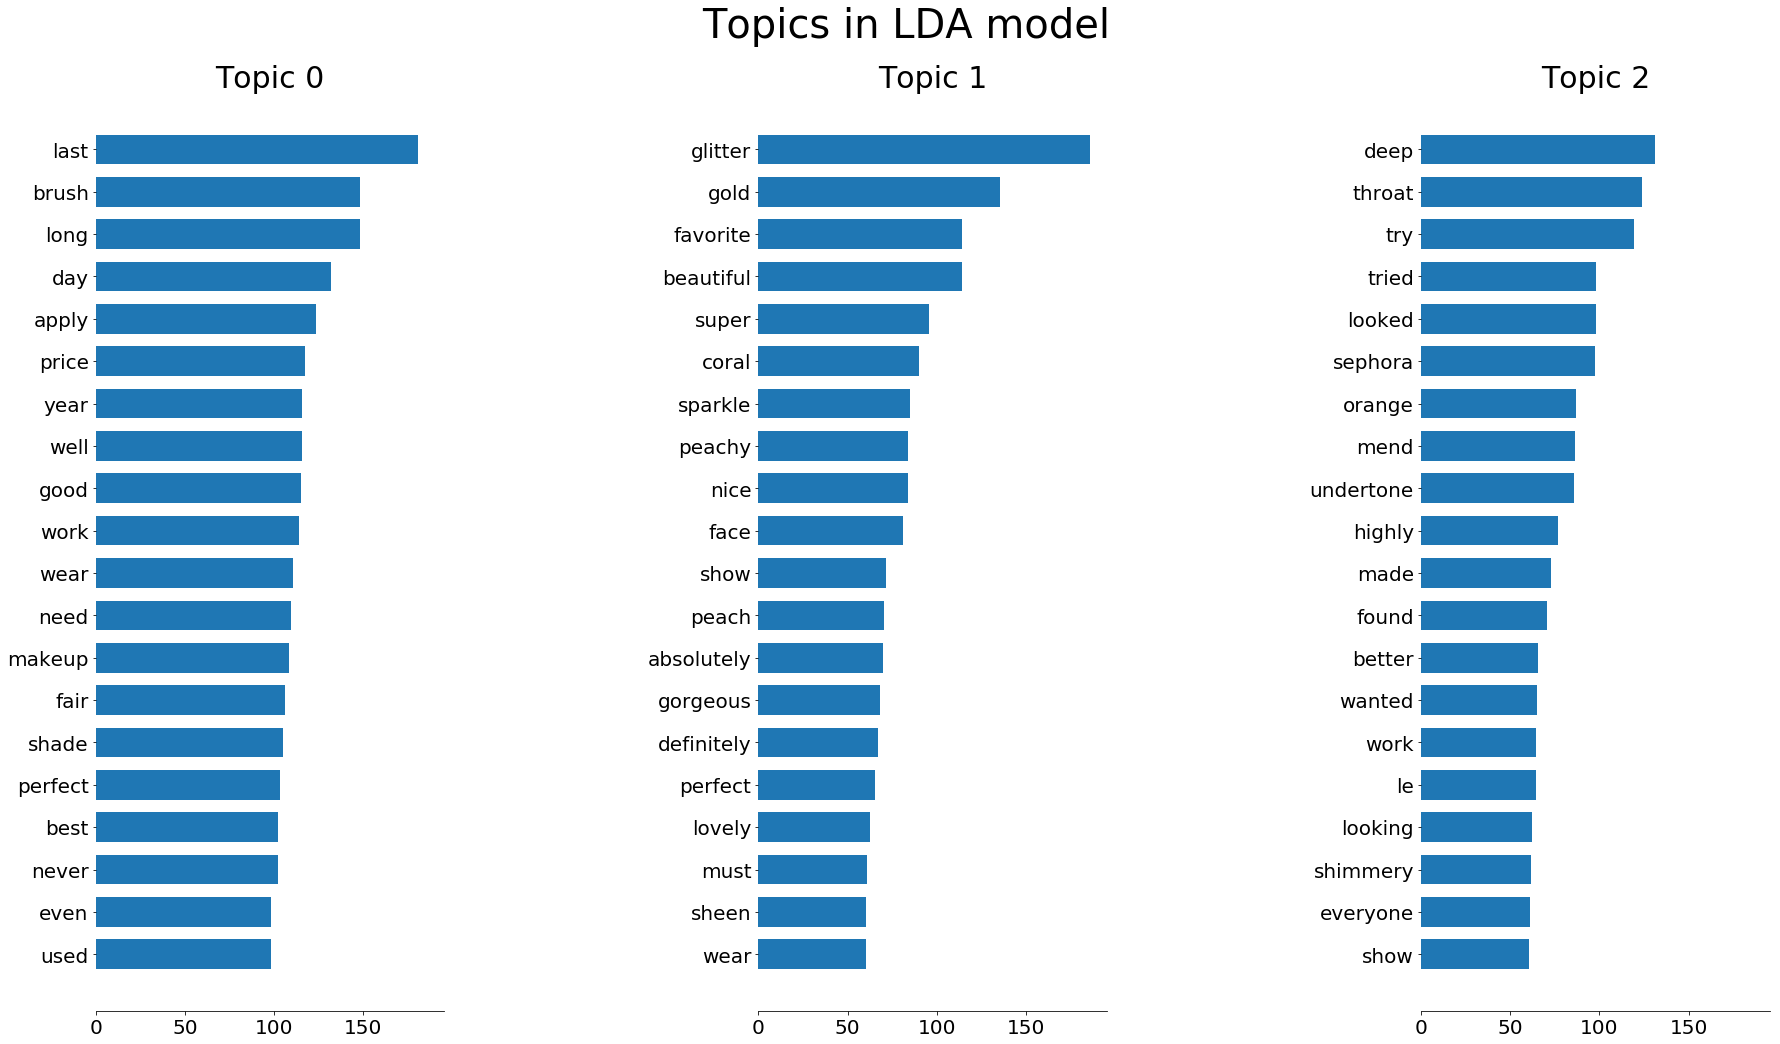

In [95]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
words = tfidf_vectorizer.get_feature_names()
plot_top_words(best_lda_model, words, n_top_words, 'Topics in LDA model')

In [96]:
# Add topic feature into products
X_train['dominant_topic'] = dominant_topic_train
X_test['dominant_topic'] = dominant_topic_test

C:\Users\Gladys Koh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gladys Koh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
X_train['dominant_topic'].value_counts()

0    2821
1    1157
2    1051
Name: dominant_topic, dtype: int64

In [99]:
X_test['dominant_topic'].value_counts()

0    968
1    355
2    354
Name: dominant_topic, dtype: int64

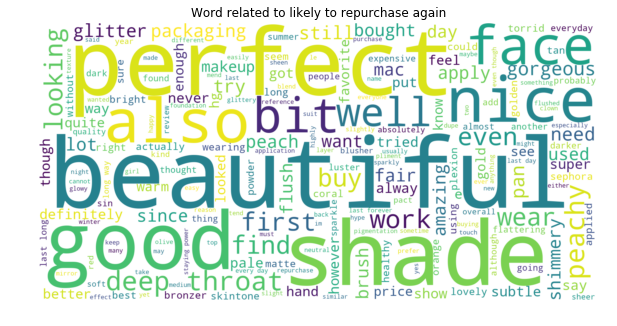

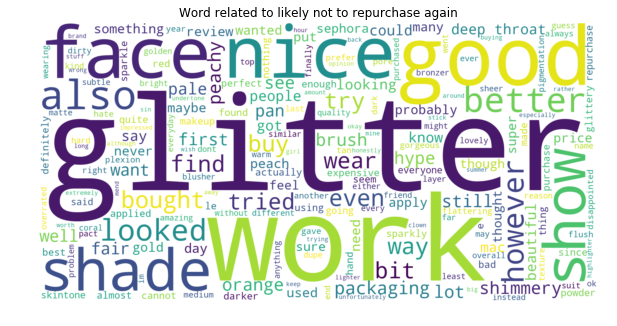

In [101]:
# Wordcloud
repurchase_products = products[products['repurchase_again'] == 1]
donot_repurchase_products = products[products['repurchase_again'] == 0]
repurchase_reviews = " ".join(r for r in repurchase_products['review_processed_stop'])
donot_repurchase_reviews = " ".join(r for r in donot_repurchase_products['review_processed_stop'])

# Create and generate a word cloud image that excludes domain-specific and common stopwords
repurchase_wordcloud = WordCloud(stopwords=stop, background_color="white", width=2000, height=1000).generate(repurchase_reviews)
donot_repurchase_wordcloud = WordCloud(stopwords=stop, background_color="white", width=2000, height=1000).generate(donot_repurchase_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(repurchase_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word related to likely to repurchase again")
plt.show()

plt.figure(figsize=(10, 7))
plt.imshow(donot_repurchase_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word related to likely not to repurchase again")
plt.show()

# Export data for model building

In [102]:
# Check all columns in train set
X_train.columns

Index(['review', 'repurchase', 'packaging', 'review_processed',
       'product_Blush - Angelika', 'product_Blush - Deep Throat',
       'product_Blush - Dolce Vita', 'product_Blush - Exhibit A',
       'product_Blush - Luster', 'product_Blush - Madly',
       'product_Blush - Orgasm', 'product_Blush - Sex Appeal',
       'product_Blush - Sin', 'product_Blush - Taj Mahal',
       'product_Blush - Torrid', 'product_Mata Hari Blush',
       'product_Super Orgasm ', 'age_25-29', 'age_30-35', 'age_36-43',
       'age_44-55', 'age_56 & Over', 'age_Under 18', 'polarity',
       'subjectivity', 'word_count', 'char_count', 'avg_word_length',
       'twitter_sentiment', 'twitter_subjectivity', 'review_processed_stop',
       'dominant_topic'],
      dtype='object')

In [110]:
# Keep only numerical columns
X_train_numeric = X_train.drop(['review','review_processed','review_processed_stop'],axis=1)
X_test_numeric = X_test.drop(['review','review_processed','review_processed_stop'],axis=1)

In [114]:
# Extract column names from numeric and vectorizer
column_names = list(X_train_numeric.columns) + tfidf_vectorizer.get_feature_names()

In [116]:
# Concatenate numerical and text features
from scipy.sparse import hstack
X_train_final = pd.DataFrame(hstack([X_train_numeric, X_train_dtm]).toarray(), columns = column_names)
X_test_final = pd.DataFrame(hstack([X_test_numeric, X_test_dtm]).toarray(), columns = column_names)

In [117]:
# Check initial numerical train shape
X_train_numeric.shape

(5029, 29)

In [118]:
# Check initial text train shape
X_train_dtm.toarray().shape

(5029, 163)

In [119]:
# Check final train shape
X_train_final.shape

(5029, 192)

In [120]:
# Check final test shape
X_test_final.shape

(1677, 192)

In [137]:
# X_train_final.to_csv('data/X_train.csv', index = False)
# X_test_final.to_csv('data/X_test.csv', index = False)
# y_train.to_csv('data/y_train.csv', index = False)
# y_test.to_csv('data/y_test.csv', index = False)

## Model Building

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score ,roc_curve, auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  